In [11]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.utils import to_categorical
import numpy as np
np.random.seed(0)

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(X_train, y_train),(X_test, y_test)=mnist.load_data()

11493376/11490434 [==============================] - 10s 1us/step


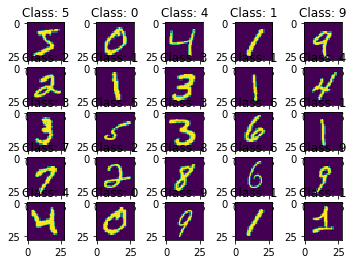

In [4]:
for idx in range(25):
    plt.subplot(5,5,idx+1)
    plt.imshow(X_train[idx])
    plt.title("Class: {}".format(y_train[idx]))

In [6]:
img_rows, img_cols = X_train.shape[1], X_train.shape[2]

X_train = X_train.reshape(-1,img_rows,img_cols,1)
X_test = X_test.reshape(-1,img_rows,img_cols,1)

input_shape=(img_rows,img_cols,1)

X_train.shape

(60000, 28, 28, 1)

In [8]:
if np.max(X_train) > 1: X_train = X_train / 255
if np.max(X_test) > 1: X_test = X_test / 255

In [12]:
if len(y_train.shape) == 1:
    num_classes = len(set(y_train))
    y_train = to_categorical(y_train, num_classes)
    y_test = to_categorical(y_test, num_classes)

In [17]:
model = Sequential([
    Conv2D(filters=32,kernel_size=(3,3),input_shape=input_shape),
    MaxPool2D(pool_size=(2,2)),
    
    Conv2D(filters=64,kernel_size=(3,3),input_shape=input_shape),
    MaxPool2D(pool_size=(2,2)),
    
    Flatten(),
    Dense(512,activation='relu'),
    
    Dense(num_classes,activation='softmax')
])
model.compile(loss="categorical_crossentropy", optimizer='adam',metrics=['accuracy'])

In [18]:
model.fit(
    X_train,y_train,
    batch_size=128,
    epochs=3,
    validation_data=(X_test,y_test)
)

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 157s 3ms/step - loss: 0.1624 - acc: 0.9524 - val_loss: 0.0496 - val_acc: 0.9834
Epoch 2/3
60000/60000 [==============================] - 156s 3ms/step - loss: 0.0442 - acc: 0.9865 - val_loss: 0.0448 - val_acc: 0.9841
Epoch 3/3
60000/60000 [==============================] - 153s 3ms/step - loss: 0.0278 - acc: 0.9909 - val_loss: 0.0356 - val_acc: 0.9877


In [19]:
score = model.evaluate(X_test, y_test,verbose=0)

In [20]:
score

[0.035597239891276694, 0.9877]